In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import invgamma
from QEB import *
import statsmodels.api as sm 
import warnings
from tqdm.auto import tqdm
from collections import Counter
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
MAX_RAD = 0.8
wqeb = WQEB()
data = wqeb.read_data(
    root_map='./dataset/emd_11103.map', 
    root_pdb='./dataset/6z6u.pdb',
    atomic="CA",
    max_rad = MAX_RAD, 
    base_num_points=2, 
    max_points=10
    )

  0%|          | 0/4128 [00:00<?, ?it/s]

In [3]:
ols_dict = {}
for name in tqdm(data):
    ols_dict[name] = []
    for i in range(len(data[name])):
        model = sm.OLS(wqeb.data_log[name][i], wqeb.Xs_tilde[name][i])    #OLS回歸
        results = model.fit()
        ols_dict[name].append(results.params)
    ols_dict[name] = np.array(ols_dict[name])

  0%|          | 0/20 [00:00<?, ?it/s]

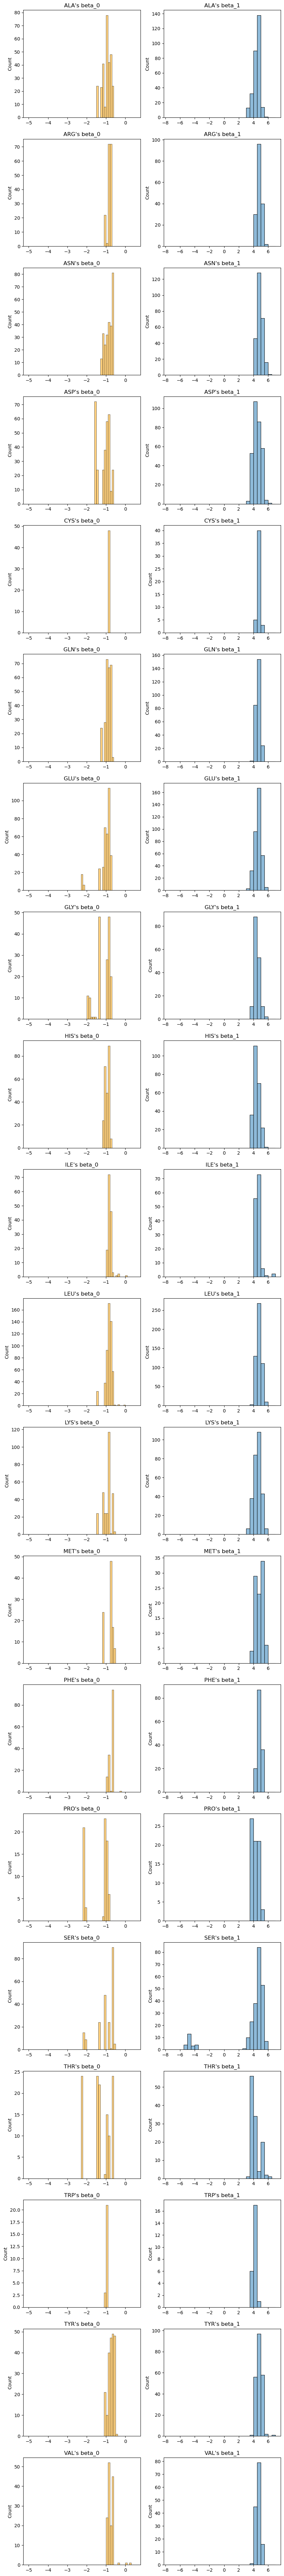

In [4]:
fig, axes = plt.subplots(nrows = len(ols_dict), ncols = 2, figsize = (10, 100))
for idx, elements in enumerate(ols_dict.items()):
    name, key = elements
    beta_0, beta_1 = key[:, 0], key[:, 1]
    sns.histplot(beta_0, binwidth=0.1, binrange=(-5, 0.5), alpha=0.5, label=f"{name}'s beta_0", ax=axes[idx][0], color="orange")
    axes[idx][0].title.set_text(f"{name}'s beta_0")
    sns.histplot(beta_1, binwidth=0.5, binrange=(-7.5, 7), alpha=0.5, label=f"{name}'s beta_1", ax=axes[idx][1])
    axes[idx][1].title.set_text(f"{name}'s beta_1")
plt.show()

In [6]:
counter = Counter(ols_dict[key][i][:, 1])
# for X_k, num in counter.items():
#     densities_chosen = densities[start: start + num]

TypeError: unhashable type: 'numpy.ndarray'

  0%|          | 0/20 [00:00<?, ?it/s]

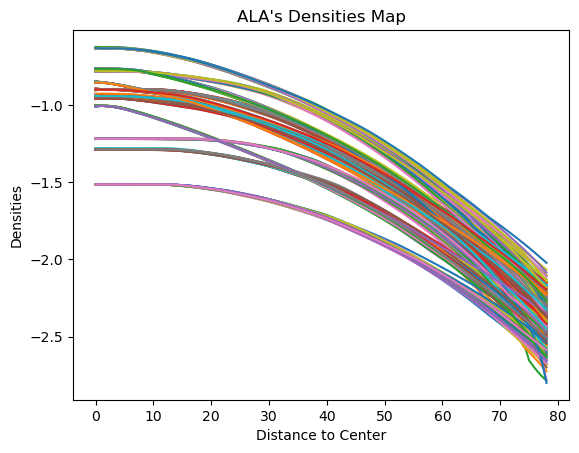

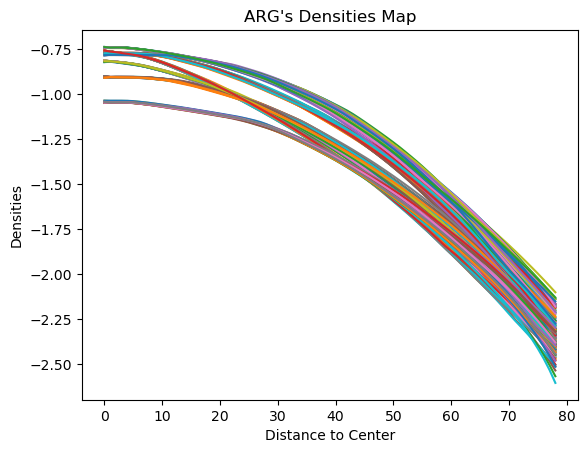

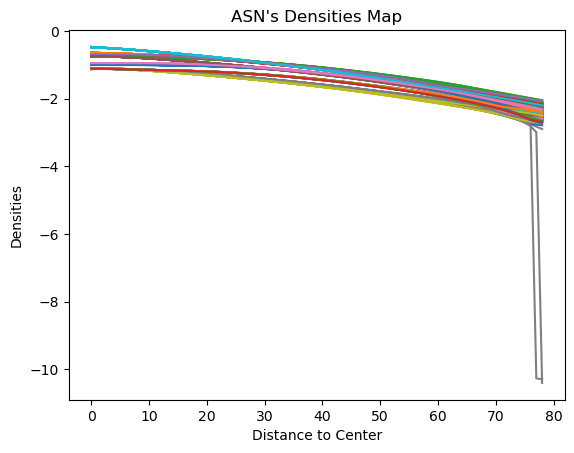

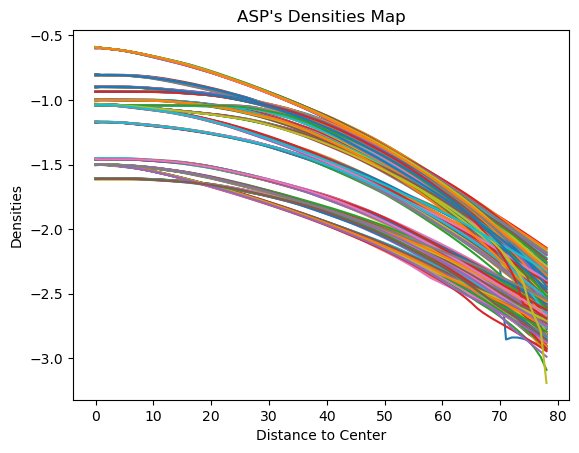

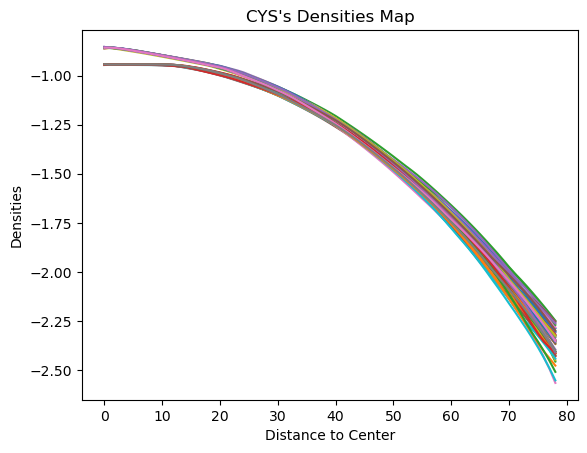

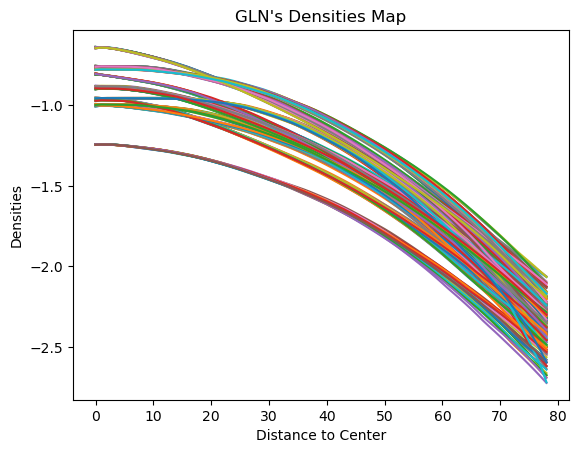

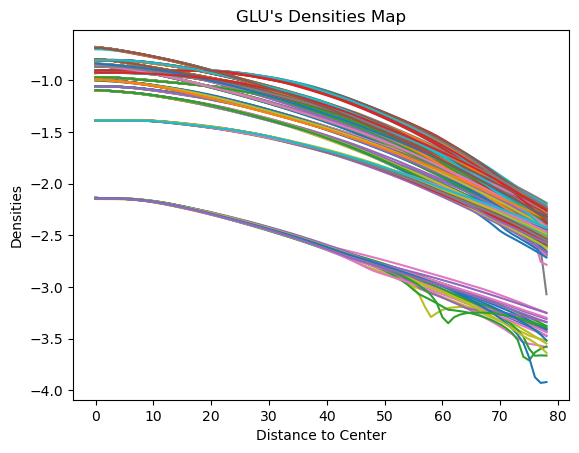

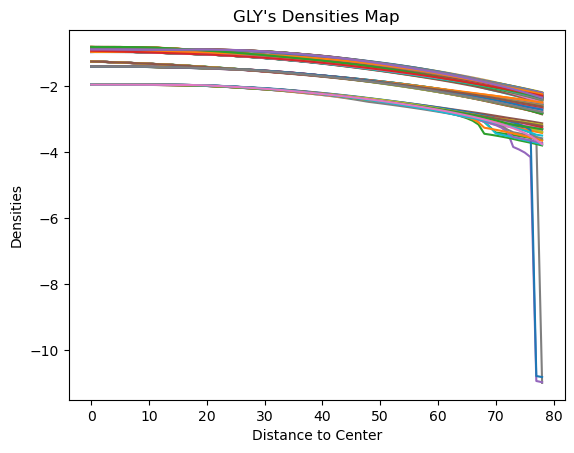

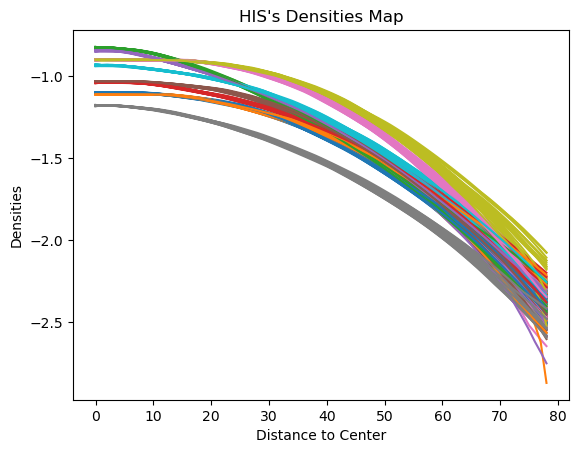

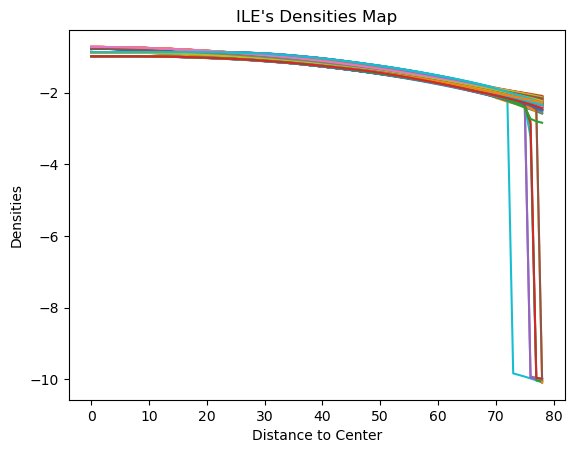

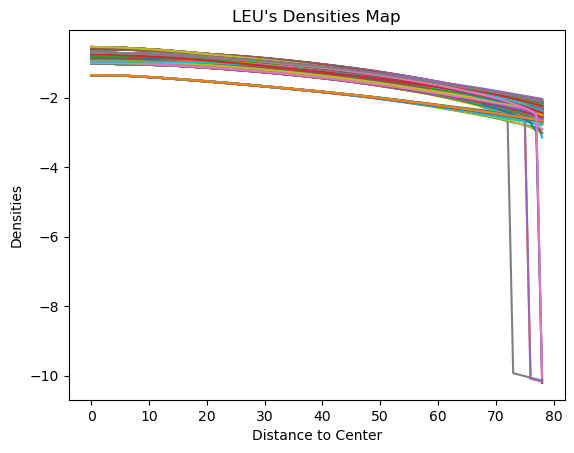

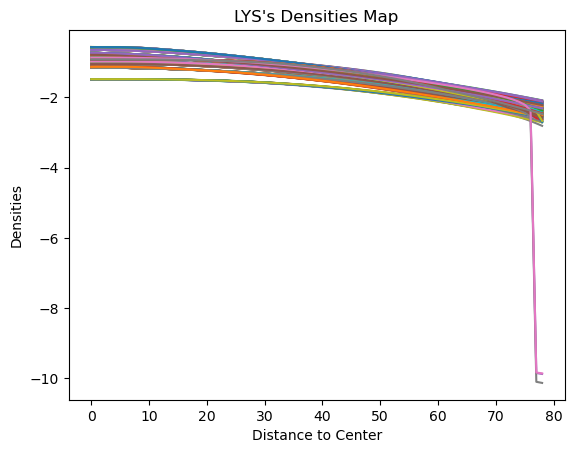

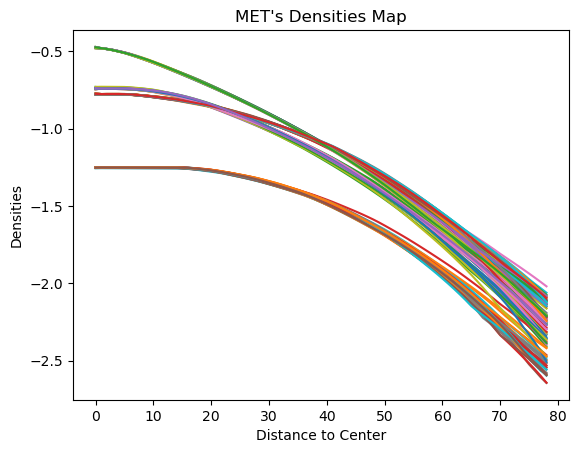

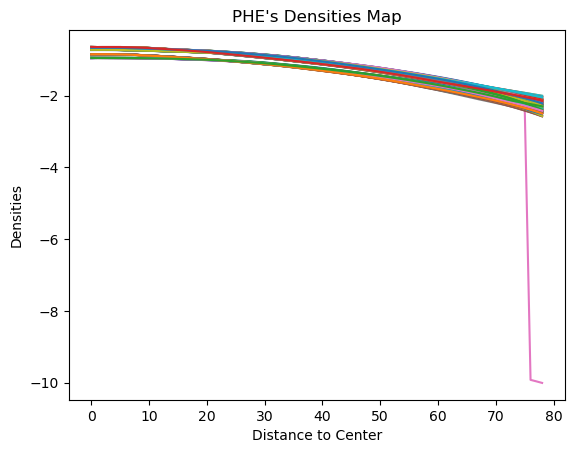

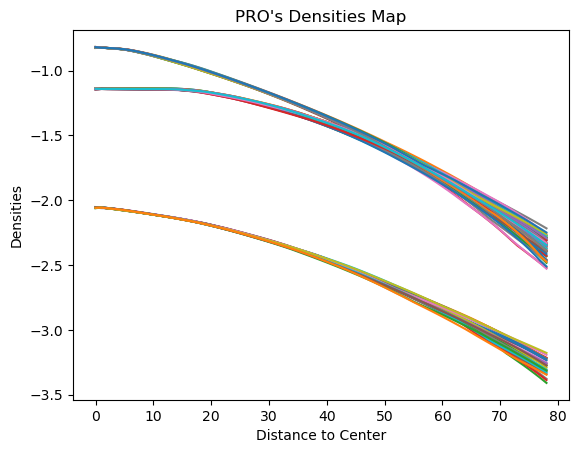

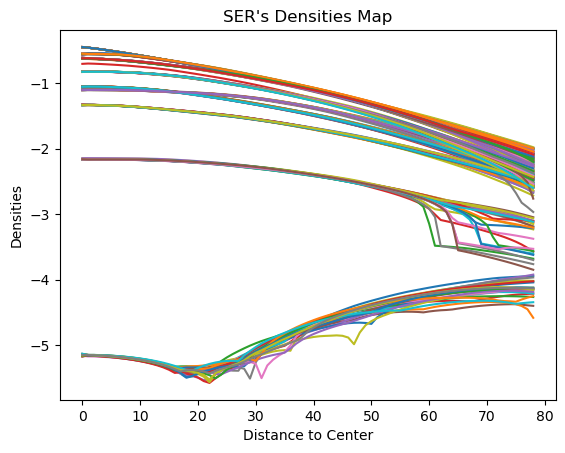

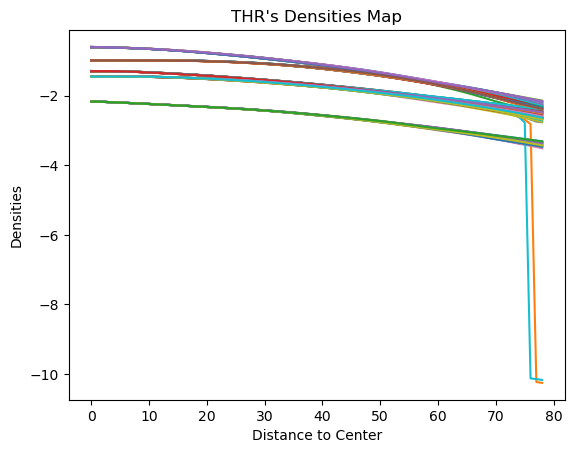

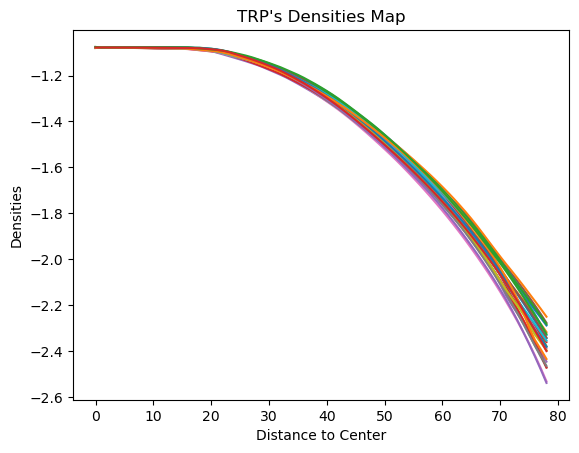

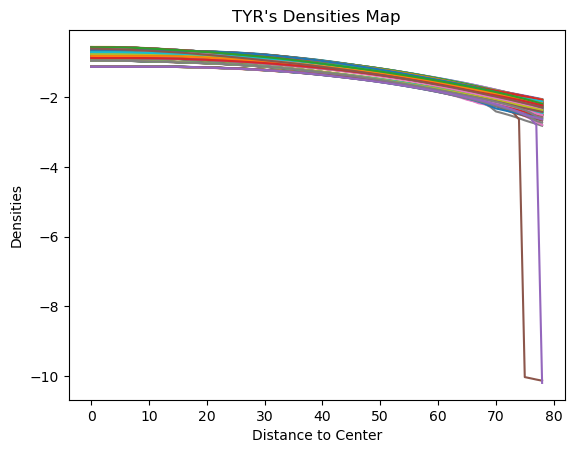

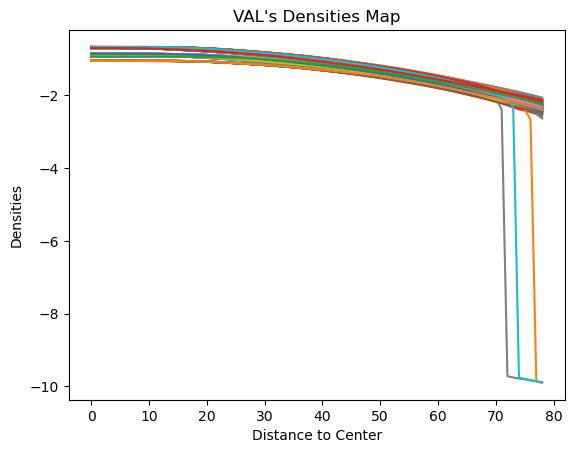

In [21]:
for name in tqdm(ols_dict):
    for idx in range(len(ols_dict[name])):
        distances = wqeb.distances_to_center[name][idx]
        densities = wqeb.data_log[name][idx]
        counter = Counter(distances)
        densities_mean = []
        start = 0
        for X_k, num in counter.items():
            densities_chosen = densities[start: start + num]
            densities_mean.append(np.mean(densities_chosen))
            start += num
        sns.lineplot(densities_mean)
    plt.title(f"{name}'s Densities Map")
    plt.xlabel("Distance to Center")
    plt.ylabel("Densities")
    plt.show()

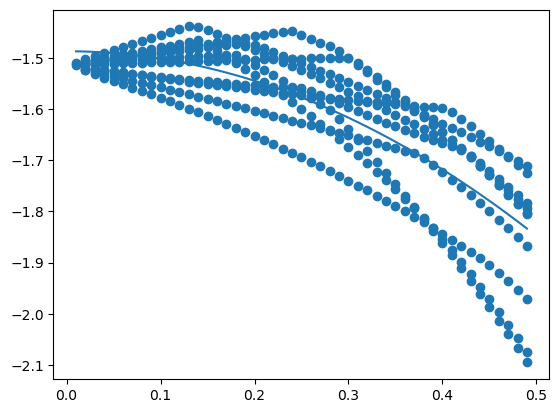

In [48]:
name = "ALA"
i = 10
plt.scatter(wqeb.distances_to_center[name][i], wqeb.data_log[name][i], label='A')
plt.plot(wqeb.distances_to_center[name][i], wqeb.Xs_tilde[name][i] @ ols_dict[name][i], label='A')